In [1]:
import matplotlib.pyplot as plt
import copy
import numpy as np
import cv2


# MAP_PATH = '/home/rilab/catkin_ws/src/aws-robomaker-small-house-world/maps/turtlebot3_waffle_pi/map.pgm'

In [11]:
with open(MAP_PATH, 'rb') as pgmf:
    im = plt.imread(pgmf)

In [12]:
im.dtype

dtype('uint8')

In [15]:
config_file = '/home/rilab/catkin_ws/src/aws-robomaker-small-house-world/maps/turtlebot3_waffle_pi/map.yaml'

In [17]:
import yaml

with open(config_file) as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    map_config = yaml.load(file, Loader=yaml.FullLoader)

In [20]:
map_config

{'image': 'map.pgm',
 'resolution': 0.05,
 'origin': [-12.5, -12.5, 0.0],
 'negate': 0,
 'occupied_thresh': 0.65,
 'free_thresh': 0.196}

In [21]:
STEP_SIZE = map_config['resolution']
ORGIN = map_config['origin'][:-1]
unknown_color = int(map_config['free_thresh']*255)

In [26]:
map = np.zeros((im.shape[0],im.shape[1],3))
occupied = (im==0)
map[occupied] = [0,0,0]
free = (im == 254)
map[free] = [1,1,1]

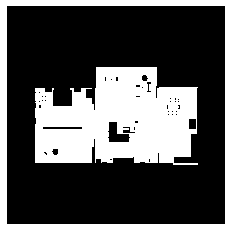

In [28]:
plt.imshow(map)
plt.axis('off')
plt.show()

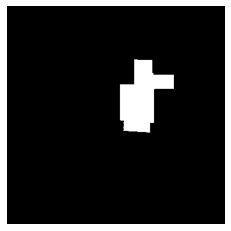

In [27]:
new = np.load('../../maps/new_map.npy')
plt.imshow(new)
plt.axis('off')
plt.show()

In [28]:
new.mean()

0.048041449652777776

In [29]:
new = new[:,:,0]

In [30]:
new_cv = new

In [31]:
new_cv = (255*new).astype(np.uint8).clip(0,255)
# new_cv = cv2.cvtColor(new_cv, cv2.COLOR_BGR2GRAY)


In [32]:
new_cv.dtype

dtype('uint8')

In [33]:
new_cv.mean()

12.250569661458334

In [34]:
cv2.imwrite("../../maps/map_v2_new.pgm", new_cv)

True

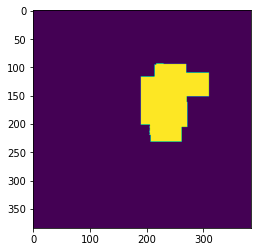

In [11]:
img = plt.imread("../../maps/map_v3.pgm")
plt.imshow(img)
plt.show()

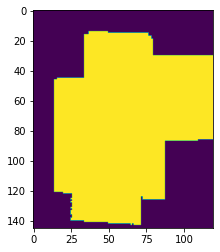

In [10]:
scenebound = [[80,225], [180,300]]
temp = img[scenebound[0][0]:scenebound[0][1],scenebound[1][0]:scenebound[1][1]]
plt.imshow(temp)
plt.show()

In [4]:
scenebound[0][0]

70